In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
import torchvision
import torch.nn as nn
from torch.autograd import Variable

In [2]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(root='./data/', train=True, transform=torchvision.transforms.ToTensor(), download=False)

torch.Size([60000, 28, 28])
torch.Size([60000])


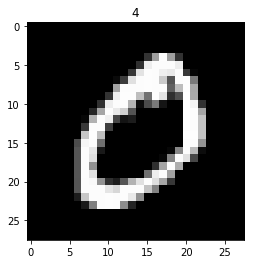

In [3]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[1].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [17]:
# Init autoencoder model

class AutoEncoder(nn.Module):
    # Size of encodeing layer (the hidden layer)
    enconding_dim = 32
    input_dim = 28*28
    output_dim = 28*28
    
    def __init__(self):
        super(AutoEncoder, self).__init__()
        # Encoder layer
        self.encoder = nn.Sequential(
            nn.Linear(self.input_dim, self.enconding_dim),
            nn.ReLU(True))
        
        # Decoder layer
        self.decoder = nn.Sequential(
            nn.Linear(self.enconding_dim, self.output_dim),
            nn.Sigmoid())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [18]:
# Define model, loss optimizer
model = AutoEncoder().cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [19]:
# Load data again with batch size for training
BATCH_SIZE = 64
N_TEST_IMG = 5

trainloader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# original data (first row) for viewing
view_data = Variable(train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.)

In [24]:
num_epochs = 20
# trainning
for epoch in range(num_epochs):
    for step, (x, y) in enumerate(trainloader):
        x = Variable(x.view(-1, 28*28))
        y = Variable(x.view(-1, 28*28))
        label = Variable(y)
        
        # ===================forward=====================
        output = model(x.cuda())
        loss = criterion(output, label.cuda())
        
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # logging
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.data[0]))
    
    out = model(view_data.cuda())
    
    # initialize figure
    f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
    
    for i in range(N_TEST_IMG):
        a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())
    
    for i in range(N_TEST_IMG):
        a[1][i].clear()
        a[1][i].imshow(np.reshape(out.data.cpu().numpy()[i], (28, 28)), cmap='gray')
        a[1][i].set_xticks(()); a[1][i].set_yticks(())
    plt.show(); plt.pause(0.05)

RuntimeError: size mismatch, m1: [1792 x 28], m2: [784 x 32] at c:\new-builder_3\win-wheel\pytorch\aten\src\thc\generic/THCTensorMathBlas.cu:249